In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First we need to import the Algorithmic Kitchen libraries.

In [11]:
from storm.locals import *
from chef.models import *
from knife import FoodImporter
import cookbook

Then we open the database, we call it cookbook.

In [12]:
store = Store(cookbook.open())

We search for what we need, in this case we search for the Blueberry foodstuff and print its name and the URL to a picture containing blueberries.

In [13]:
fs = store.find(Foodstuff, Foodstuff.name.like(u'blueberry%')).any()
print "name", fs.name
print "photo url", fs.photo.url

name blueberry
photo url http://ichef.bbci.co.uk/food/ic/food_16x9_608/recipes/blueberrymuffins_67846_16x9.jpg


To display the image, just:

In [26]:
from IPython.display import Image as PyImage

PyImage(url=fs.photo.url)

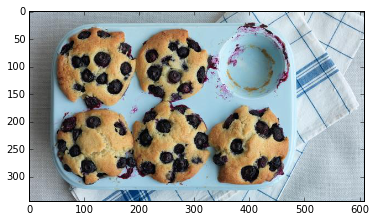

In [51]:
#from PIL import Image
#import matplotlib.pyplot as plt
#import urllib, cStringIO

#fimg = cStringIO.StringIO(urllib.urlopen(fs.photo.url).read())
#blueberries = Image.open(fimg)
import chef

blueberries = chef.image_from_url(fs.photo.url)
plt.imshow(blueberries)

## Pixelsorting foodstuffs

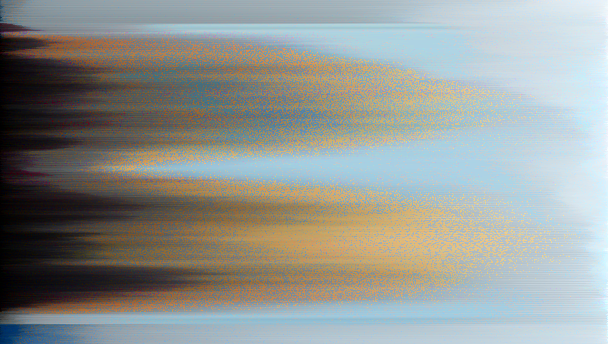

In [53]:
from chef.algo import pixelsorting
pixelsorting.sort_all_pixels(blueberries)

In [57]:
fsc = store.find(Foodstuff, Foodstuff.name.like(u'cucumber%')).any()
print "name", fsc.name
print "photo url", fsc.photo.url
PyImage(url=fsc.photo.url)

name cucumber
photo url http://ichef.bbci.co.uk/food/ic/food_16x9_608/recipes/pickledcucumber_11033_16x9.jpg


## Nudity detection
The algorithm for nudity detection is fairly complex and slow, it taks a few seconds to process a single image, so use it with care.

### Is the cucumber nude?

In [67]:
import chef
from chef.algo import nude

cucumber = chef.image_from_url(fsc.photo.url)
print "This cucumber is nude is", nude.is_nude(cucumber)

This cucumber is nude is False


### Testing against some kind of nudity

In [66]:
femen = chef.image_from_url('http://www.hurriyetdailynews.com/images/news/201403/n_63958_1.jpg')
print "The person in this picture is nude is", nude.is_nude(femen)

The person in this picture is nude is True
